## 학습정리
### 8장. 경사 하강법 

#### 8.1 경사 하강법에 숨은 의미
* 가장 적합한 모델 찾기 : 최적화 문제에 대한 답
    * 모델의 오류(error)를 최소화 
    * 가능도(likelihood)를 최대화
* 그래디언트 (gradient) : 편미분 벡터 
    * 함수가 가장 빠르게 증가할 수 있는 방향을 나타낸다.
    * 전역 최솟값이 하나만 존재할 때 유용
    * 임의의 시작점을 잡은 후, 그래디언트를 계산, 그래디언트의 방향(함수의 출력 값이 가장 많이 증가하는 방향)으로 조금 이동하는 과정을 여러번 반복
    
#### 8.2 그래디언트 계산하기
* f가 단변수 함수일때 : x에서의 미분값은 x가 아주 조금 변했을 때 f(x)의 변화량을 의미
    * x의 변화량 = h 
    * h가 0에 점근하게 할때 미분값 : 함수변화율(diffrence quotient)의 극한값
    * 도함수(derivative)를 구할 수 없는 경우 : 아주 작은 e값을 대입해 미분값을 어림잡음

* f가 다변수 함수 : 입력 변수 중 하나에 작은 변화가 있을 때 f(x)의 변화량을 알려주는 편도함수가 여러개 존재
    * i 번째 편도함수 : i 번째 변수를 제외한 다른 모든 입력 변수를 고정시켜서 계산할 수 있다
    
#### 8.3 그래디언트 적용하기
* 임의의 시작점을 잡고, 그래디언트가 아주 작아질 때까지 경사의 반대 방향으로 조금씩 이동

#### 8.4 적절한 이동 거리 정하기
* 경사를 이동할때 이동거리(step size) 정하는 법
    1. 이동거리를 고정
        * 간편 
    2. 시간에 따라 이동거리를 점차 줄임
    3. 이동할 때마다 목적 함수를 최소화하는 이동 거리로 정함
        * 계산 비용이 너무 큼
* 이동거리가 너무 짧으면 경사 하강법을 수행하는데 오래 걸림
* 이동거리가 너무 길면 최적화하려는 함수가 너무 커지거나 더이상 유효하지 않을 수 있음

#### 8.5 경사 하강법으로 모델 학습

#### 8.6 미니 배치와 SGD(Stochastic Gradient Descent)

#### 8.7 더 공부해 보고 싶다면


## code

In [3]:
from typing import List

Vector = List[float]

In [4]:
# 8.1 example 함수의 최대값 또는 최소값을 찾으려면? 

def dot(v: Vector, w: Vector) -> float:
    """Computes v_1 * w_1 + ... + v_n * w_n"""
    assert len(v) == len(w), "vectors must be same length"
    
def sum_of_squares(v:Vector) -> float :
    """v에 속해 있는 항목들의 제곱합을 계산한다."""
    return dot(v,v)


In [5]:
from typing import Callable
# 함수의 변화율 
def difference_quotient(f: Callable[[float],float],
                       x : float,
                       h : float) -> float :
    return (f(x + h) - f(x)) / h

In [6]:
# 도함수를 구할 수 있는 경우 
# 제곱함수
def square(x:float)->float :
    return x*x

# 제곱함수의 도함수
def derivative(x:float)-> float :
    return 2*x

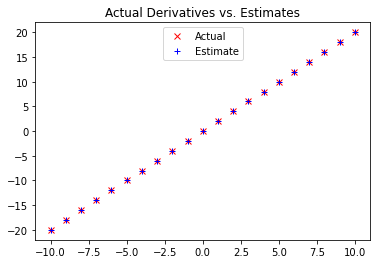

In [7]:
# 도함수(derivative)를 구할 수 없는 경우 : 아주 작은 e값을 대입해 미분값을 어림잡음

xs = range(-10,11)
actuals = [derivative(x) for x in xs]
estimates = [difference_quotient(square, x, h = 0.001) for x in xs] # x(-10,10)에서 h =0.001일때 x에 대한 square함수의 변화율

# 두 계산식의 결괏값이 거의 비슷함을 보여주기 위한 그래프
import matplotlib.pyplot as plt
plt.title("Actual Derivatives vs. Estimates")
plt.plot(xs, actuals, 'rx' , label = 'Actual')
plt.plot(xs, estimates, 'b+' , label = 'Estimate')
plt.legend(loc=9)
plt.show()


In [8]:
from typing import Callable

def partial_difference_quotient(f: Callable[[Vector],float],
                               v : Vector,
                               i : int,
                               h : float ) -> float :
    """함수 f의 i번째 편도함수가 v에서 가지는 값"""
    w = [v_j + (h if j == i else 0) for j,v_j in enumerate(v)] # j번째가 아니면 0 
    
    return (f(w) - f(v)) / h

In [9]:
# 도함수와 마찬가지로 그래디언트의 근사값을 구함
def estimate_gradient(f: Callable[[Vector], float],
                     v: Vector,
                     h: float = 0.0001):
    return [partial_difference_quotient(f,v,i,h)
           for i in range(len(v))]


In [10]:
# linear_algebra함수 
import random

def squared_distance(v: Vector, w: Vector) -> float :
    """(v_1 - w_1) ** 2 +...+ (v_n - w_n) ** 2 """
    return sum_of_squares(subtract(v,w))

def distance(v: Vector, w: Vector) -> float :
    """벡터 v와 w간의 거리를 계산"""
    return math.sqrt(squared_distance(v,w))

def add(a,b) : return a + b

def scalar_multiply(c:float, v: Vector)-> Vector :
    """모든 성분을 c로 곱하기"""
    return [c*v_i for v_i in v]

In [11]:
# sum_of_squares는 v가 0 벡터일 때 가장 작은 값을 가진다. 모른다고 가정하고 그래디언트 적용
def gradient_step(v: Vector, gradient: Vector, step_size : float) -> Vector :
    """v에서 step_size만큼 이동하기"""
    assert len(v) == len(gradient)
    step = scalar_multiply(step_size, gradient)
    return add(v, step)

def sum_of_squares_gradient(v : Vector) -> Vector : 
    return [2*v_i for v_i in v]


In [ ]:
# 임의의 시작점을 선택
v = [random.uniform(-10,10) for i in range(3)] 

for epoch in range(100):
    grad = sum_of_squares_gradient(v) # v의 그래디언트 계산
    v = gradient_step(v, grad, -0.01) # 그래디언트의 -0.01만큼 이동
    print(epoch, v)

assert distance(v, [0,0,0]) < 0.001
# [0,0,0]에 아주 가깝게 수렴

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




19 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

